# Unsupervised Analysis of Days of Week

Treating crossings eash day as features to learn about the relationships between various days 

In [1]:
%matplotlib inline
import matplotlib
import pandas as pd 
import numpy as np

## Get Data 

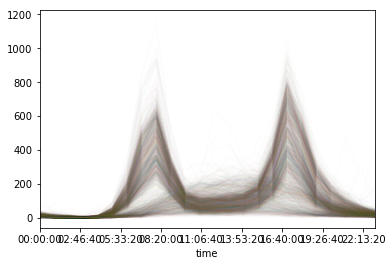

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## Principal Component Analysis

In [3]:
X = pivoted.fillna(0).T.values
X.shape

(1794, 24)

In [4]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [5]:
X2.shape

(1794, 2)

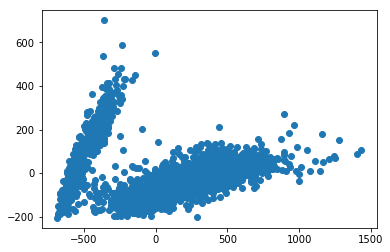

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(X2[:,0], X2[:,1])

## Unsupervised Clustering

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1])

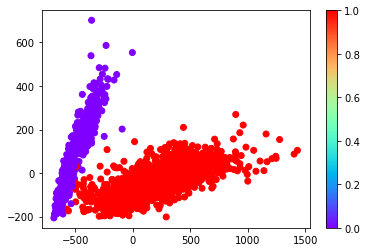

In [8]:
plt.scatter(X2[:, 0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

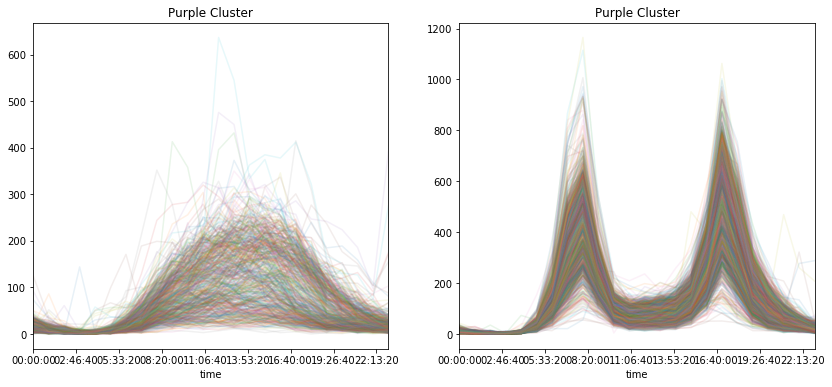

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

In [10]:
import pandas as pd 
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

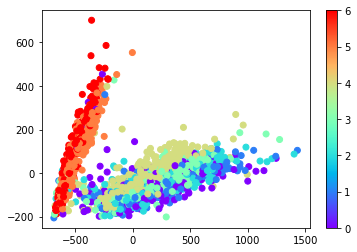

In [11]:
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar();

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', length=1239, freq=None)